In [1]:
import requests
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm import tqdm
from cutout import Cutout
from PIL import Image, ImageDraw

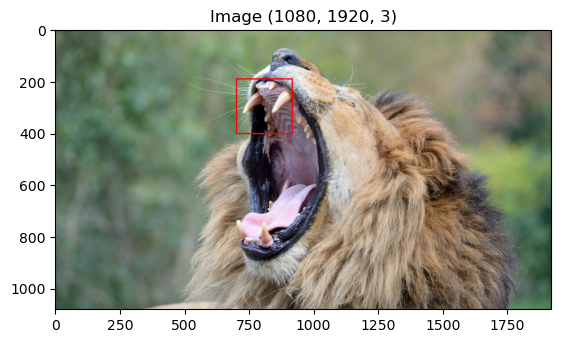

In [2]:
bboxes = [[700, 190, 220, 215]] #700, 190, 220, 215
url_img = "https://www.anigaido.com/media/zoo_animaux/101-200/158/lion-7-panthera-leo-copy-thomas-pierre-xl.jpg"
image_classification = Image.open(requests.get(url_img, stream = True).raw).convert("RGB")
plt.title("Image {}".format(np.array(image_classification).shape))
draw = ImageDraw.Draw(image_classification)
for bbox in bboxes:
    x,y,w,h = bbox
    draw.rectangle([x,y,w+x,h+y], outline = "red", width = 5)

plt.imshow(image_classification)

In [3]:
def imshows(image_list, bboxes=None, images_per_row=5):
    num_images = len(image_list)
    num_rows = (num_images + images_per_row - 1) // images_per_row 
    
    fig, axes = plt.subplots(num_rows, images_per_row, figsize=(images_per_row * 3, num_rows * 3))
    fig.set_size_inches((12,8))
    
    if num_rows > 1:
        axes = axes.flatten()
    else:
        axes = np.array(axes).reshape(-1)
    
    for i, image in enumerate(image_list):
        ax = axes[i]
        ax.imshow(image)
        ax.axis('off')
        
        if bboxes is not None and i < len(bboxes):
            for bbox in bboxes[i]:
                rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none')
                ax.add_patch(rect)
    
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.show()

In [4]:
transforms_classification = A.Compose([
    A.Resize(height = 500, width = 500),
    A.RandomCrop(height = 300, width = 300),
    A.Rotate(limit = 40, p = 0.9),
    A.HorizontalFlip(0.2),
    A.Blur(blur_limit = 3, p = 0.5),
    A.VerticalFlip(0.5),
    A.ColorJitter(0.8),
])

transforms_detection = A.Compose([
    A.Resize(height = 500, width = 500),
    A.RandomCrop(height = 300, width = 300),
    A.Rotate(limit = 40, p = 0.9),
    A.HorizontalFlip(0.2),
    A.Blur(blur_limit = 3, p = 0.5),
    A.VerticalFlip(0.5),
    A.ColorJitter(0.8),
],
bbox_params = A.BboxParams(format = "coco", label_fields = []))

In [5]:
image_list = [image_classification]
image_classification = np.array(image_classification)
for i in tqdm(range(15)):
    augmented = transforms_classification(image = image_classification)
    augmented_class = augmented["image"]
    image_list.append(augmented_class)

100%|██████████| 15/15 [00:00<00:00, 484.36it/s]


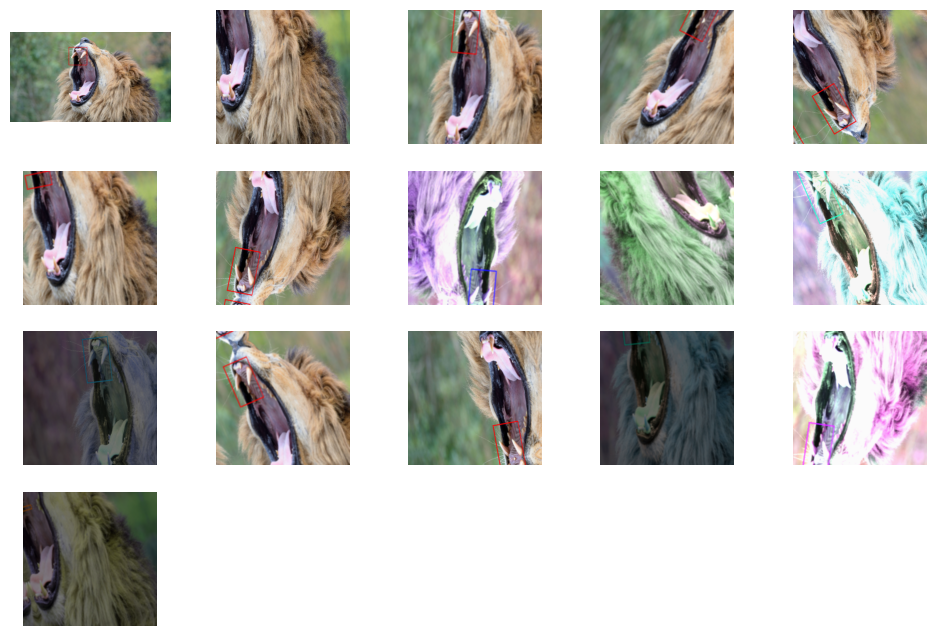

In [6]:
imshows(image_list)

In [7]:
image_list = [image_classification]
bboxes_array = [bboxes]
for i in tqdm(range(10)):
    augmented = transforms_detection(image = image_classification, bboxes = bboxes)
    augmented_class = augmented["image"]
    image_list.append(augmented_class)
    bboxes_array.append(augmented["bboxes"])

100%|██████████| 10/10 [00:00<00:00, 555.63it/s]


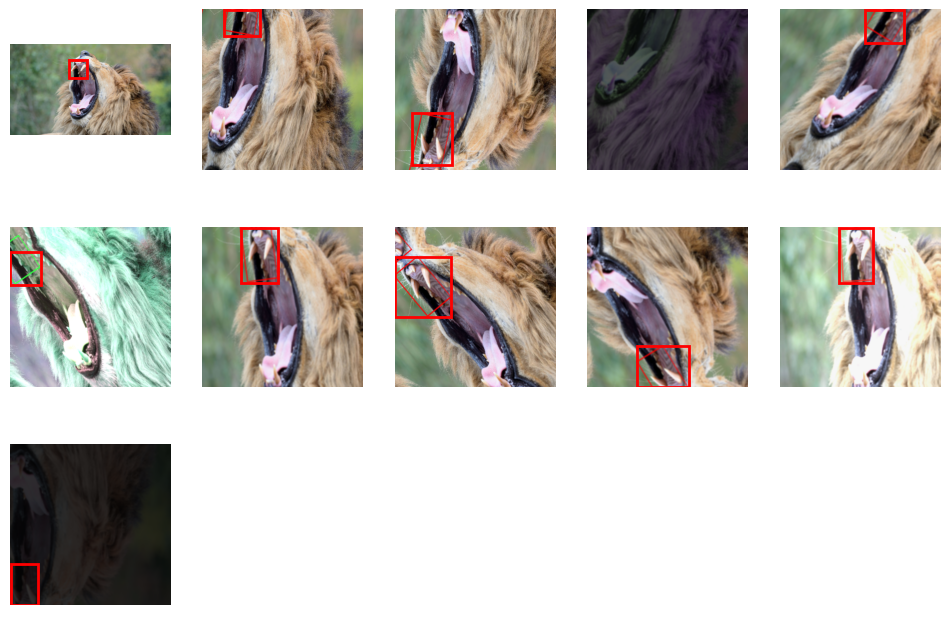

In [8]:
imshows(image_list, bboxes_array)

In [9]:
transform_cutout = A.Compose(
    [
        Cutout(
            num_holes = 8,
            max_h_size = 50,
            max_w_size = 50,
            p = 1
        )
    ],
    bbox_params = A.BboxParams(format = "coco", label_fields = [])
)

/opt/anaconda3/lib/python3.12/site-packages/albumentations/core/composition.py:161: UserWarning: Got processor for bboxes, but no transform to process it.
  self._set_keys()


100%|██████████| 5/5 [00:00<00:00, 2249.20it/s]


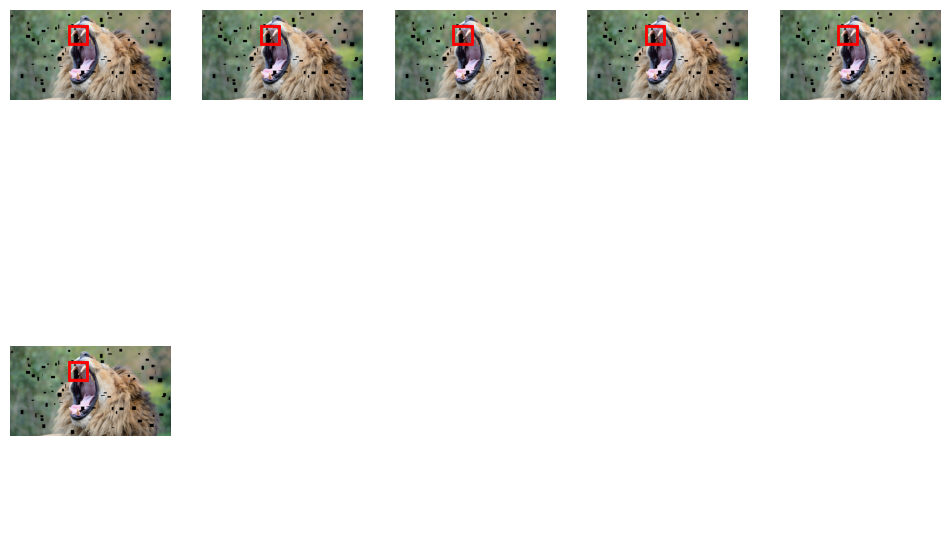

In [13]:
image_list = [image_classification]
bboxes_array = [bboxes]
for i in tqdm(range(5)):
    augmented = transform_cutout(image = image_classification, bboxes = bboxes)
    augmented_class = augmented["image"]
    image_list.append(augmented_class)
    bboxes_array.append(augmented["bboxes"])

imshows(image_list, bboxes_array)